   Age  BloodPressure  Cholesterol TreatmentType  Outcome
0   58            157          278             C        1
1   71            166          270             C        0
2   48            141          176             A        1
3   34            119          270             A        0
4   62            164          265             C        1
              Age  BloodPressure  Cholesterol     Outcome
count  100.000000       100.0000   100.000000  100.000000
mean    49.580000       129.0300   239.920000    0.530000
std     18.031499        29.4373    42.812176    0.501614
min     21.000000        80.0000   151.000000    0.000000
25%     34.000000       107.0000   203.000000    0.000000
50%     48.000000       125.0000   248.000000    1.000000
75%     66.000000       157.0000   277.000000    1.000000
max     79.000000       178.0000   297.000000    1.000000


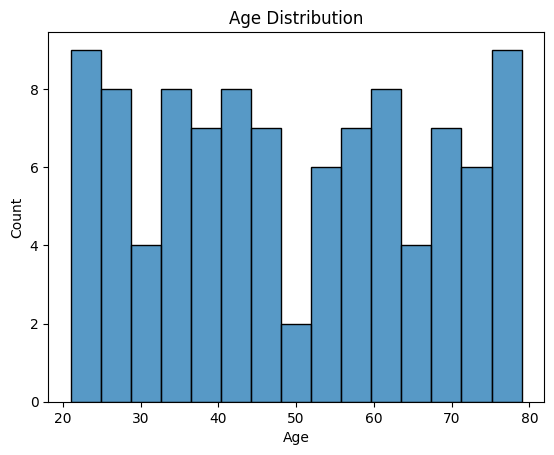

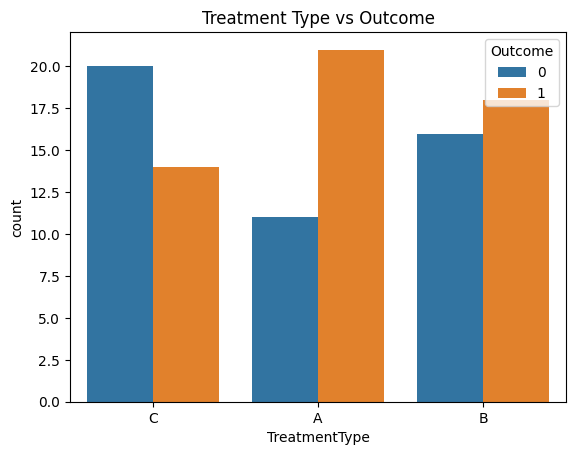

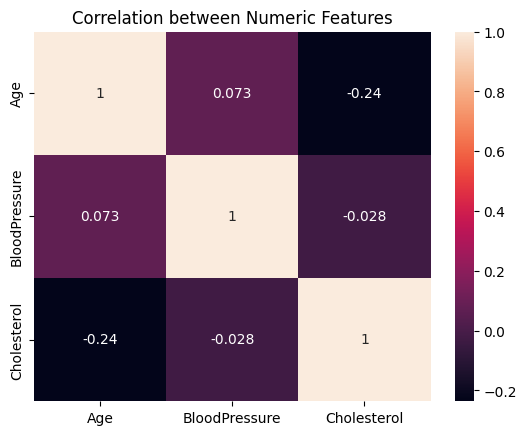

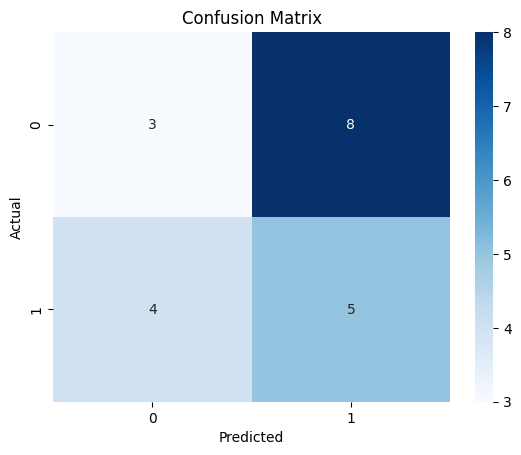

Accuracy: 0.40
Accuracy: 40%


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Sample data: 100 patients
np.random.seed(42)
data = {
    'Age': np.random.randint(20, 80, 100),
    'BloodPressure': np.random.randint(80, 180, 100),
    'Cholesterol': np.random.randint(150, 300, 100),
    'TreatmentType': np.random.choice(['A', 'B', 'C'], 100),
    'Outcome': np.random.choice([0, 1], 100)  # 0: Not Recovered, 1: Recovered
}

df = pd.DataFrame(data)

# Overview
print(df.head())

# Summary statistics
print(df.describe())

# Distribution of Age
sns.histplot(df['Age'], bins=15)
plt.title('Age Distribution')
plt.show()

# Effect of TreatmentType on Outcome
sns.countplot(x='TreatmentType', hue='Outcome', data=df)
plt.title('Treatment Type vs Outcome')
plt.show()

# Correlation matrix
numeric_features = ['Age', 'BloodPressure', 'Cholesterol']
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation between Numeric Features')
plt.show()

# Encode categorical variable
df = pd.get_dummies(df, columns=['TreatmentType'], drop_first=True)

# Features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = int(accuracy * 100)
print(f'Accuracy: {accuracy_percentage}%')
